# Diversity in Tech: Stackover flow data


In [ ]:
# Make sure you are in the correct project directory
# So you have access to the utils functions
%cd ~/PycharmProjects/diversity_stackoverflow_survey

In [15]:

from src.utils import read_dataset
from src.utils import process_str_feature
from src.utils import check_missing_pct
from src.utils import create_pct_dist_df

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
rcParams.update({'figure.autolayout': True})



## 0.0 Defaults


In [16]:
# Define constants

BASE_DIR = '/Users/imac/Desktop/udacity_project_report/'

survey_data_file = BASE_DIR + '/developer_survey_2018/survey_results_public.csv'

COL_SUBSET = ['Gender', 'EducationParents', 'RaceEthnicity', 'Salary']



## 1.0 Collect Data

In [17]:

df = read_dataset(path=survey_data_file, col_subset=COL_SUBSET, dropna=True)

missing_pct_df = check_missing_pct(df)
print ('Pct missing per col = ', missing_pct_df)


/Users/imac/anaconda/envs/base_ml/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


('Pct missing per col = ', Gender              0.0
EducationParents    0.0
RaceEthnicity       0.0
Salary              0.0
dtype: float64)


## 2.0 Preprocessing: Ethnicity feature

one-hot encoded ethnicity features and add them to the main dataframe


In [18]:

rename_race_features = {
    '0_Black or of African descent' : 'African descent',
    '0_East Asian' : 'East Asian',
    '0_Hispanic or Latino/Latina': 'Hispanic',
    '0_Middle Eastern' : 'Middle Eastern',
    '0_Native American, Pacific Islander, or Indigenous Australian' : 'Native American',
    '0_South Asian' : 'South Asian',
    '0_White or of European descent' : 'White'}


In [19]:

# View all of the unique Ethicities present in the survey
race_cats = df.RaceEthnicity.str.split(';', expand=True).stack().unique()
print('Unique cats for race are', race_cats)

# One-hot encoded RaceEthnicity feature and attach to main df.
df, ethnicity_features = process_str_feature(
    df, string_feature='RaceEthnicity', iloc_max=7)

# Rename features to make plot eaiser to read.
df = df.rename(columns=rename_race_features)


('Unique cats for race are', array(['White or of European descent', 'Hispanic or Latino/Latina',
       'South Asian', 'East Asian', 'Black or of African descent',
       'Middle Eastern',
       'Native American, Pacific Islander, or Indigenous Australian'],
      dtype=object))


## 2.1 Preprocessing: Gender Feature


In [20]:

rename_features_gender = {
    '0_Female' : 'Female',
    '0_Male': 'Male',
    '0_Non-binary, genderqueer, or gender non-conforming' : 'Non-binary',
    '0_Transgender' : 'Transgender',
    }


In [21]:

print('Unique Genders', df.Gender.unique())


('Unique Genders', array(['Male',
       'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female', 'Male;Non-binary, genderqueer, or gender non-conforming',
       'Transgender', 'Female;Transgender',
       'Non-binary, genderqueer, or gender non-conforming',
       'Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male',
       'Female;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender',
       'Female;Male;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male;Transgender'], dtype=object))


In [22]:

# One-hot encoded Gender and attach to main df.
df, gender_features = process_str_feature(df, string_feature='Gender', iloc_max=4)

# Rename features to make plot eaiser to read.
df = df.rename(columns=rename_features_gender)



## 2.2 Preprocessing: Education of parents


In [23]:

# Here I only use university and higher. The rest are counted as none, for no education.
# both doctors are mapped to PHD

rename_map_edu = {
    'edu_Bachelor\xe2\x80\x99s degree (BA, BS, B.Eng., etc.)' : 'Bachelor',
    'edu_Master\xe2\x80\x99s degree (MA, MS, M.Eng., MBA, etc.)' : 'Master',
    u'edu_Other doctoral degree (Ph.D, Ed.D., etc.)': 'PhD',
    u'edu_Primary/elementary school' : 'None',
    u'edu_Professional degree (JD, MD, etc.)': 'Professional degree',
    u'edu_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'Secondary school',
    u'edu_Some college/university study without earning a degree' : 'Some college edu',
    u'edu_They never completed any formal education' : 'None',
    u'edu_Associate degree' : 'Associate degree'
    }


In [24]:

unique_parent_edu = df.EducationParents.unique()
print('Unique Education of parents', unique_parent_edu)


('Unique Education of parents', array(['Bachelor\xe2\x80\x99s degree (BA, BS, B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Master\xe2\x80\x99s degree (MA, MS, M.Eng., MBA, etc.)',
       'Associate degree', 'They never completed any formal education',
       'Other doctoral degree (Ph.D, Ed.D., etc.)',
       'Professional degree (JD, MD, etc.)', 'Primary/elementary school'],
      dtype=object))


In [25]:

# Add one-hot encoded edu to main df
df = pd.get_dummies(df, columns=['EducationParents'], prefix='edu')

# Rename features to make plot eaiser to read.
df = df.rename(columns=rename_map_edu)


## 4. Distributions of Factors 

In [26]:

gender_features = rename_features_gender.values()
edu_featues = rename_map_edu.values()
ethnicity_features = rename_race_features.values()


## 4.1 Ethnicity


In [27]:

pct_ethnicity = create_pct_dist_df(df, features_list=ethnicity_features, feature_names='Ethnicity')
pct_ethnicity

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Ethnicity</th>
      <th>Percentage</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Middle Eastern</td>
      <td>3.518426</td>
    </tr>
    <tr>
      <th>1</th>
      <td>East Asian</td>
      <td>4.359323</td>
    </tr>
    <tr>
      <th>2</th>
      <td>White</td>
      <td>73.267586</td>
    </tr>
    <tr>
      <th>3</th>
      <td>South Asian</td>
      <td>9.226042</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Hispanic</td>
      <td>6.841516</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Native American</td>
      <td>0.490722</td>
    </tr>
    <tr>
      <th>6</th>
      <td>African descent</td>
      <td>2.296386</td>
    </tr>
  </tbody>
</table>
</div>

/Users/imac/anaconda/envs/base_ml/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


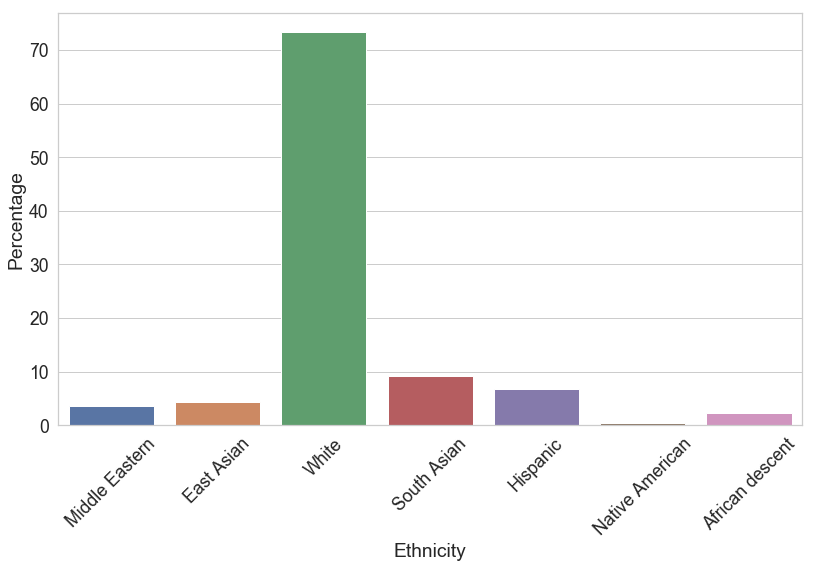

In [28]:
# Create plot.
sns.set(style="whitegrid", font_scale=1.6)
ax = sns.barplot(x='Ethnicity', y='Percentage', data=pct_ethnicity)
for item in ax.get_xticklabels():
    item.set_rotation(45)
ax.figure.savefig("Ethnicity_Distribution.jpeg")



## 4.2  Gender


In [29]:

pct_gender = create_pct_dist_df(df, features_list=gender_features, feature_names='Gender')
pct_gender


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Gender</th>
      <th>Percentage</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Non-binary</td>
      <td>0.414493</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Transgender</td>
      <td>0.250125</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Female</td>
      <td>6.434169</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Male</td>
      <td>92.901213</td>
    </tr>
  </tbody>
</table>
</div>

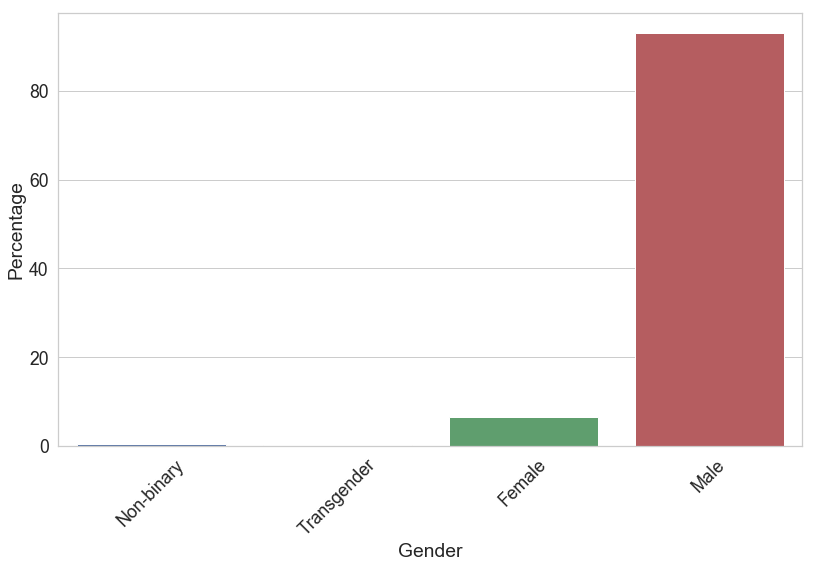

In [30]:

sns.set(style="whitegrid", font_scale=1.6)
ax = sns.barplot(x='Gender', y='Percentage', data=pct_gender)
for item in ax.get_xticklabels():
    item.set_rotation(45)
ax.figure.savefig("Gender_Distribution.jpeg")



## 4.3 Education of parents


In [31]:

pct_edu = create_pct_dist_df(df, features_list=edu_featues, feature_names='Parents Education')
pct_edu


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Parents Education</th>
      <th>Percentage</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>PhD</td>
      <td>5.548578</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Some college edu</td>
      <td>8.894770</td>
    </tr>
    <tr>
      <th>2</th>
      <td>None</td>
      <td>4.445142</td>
    </tr>
    <tr>
      <th>3</th>
      <td>None</td>
      <td>1.406208</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Master</td>
      <td>20.792590</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Associate degree</td>
      <td>4.642505</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Bachelor</td>
      <td>27.191173</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Professional degree</td>
      <td>4.225352</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Secondary school</td>
      <td>17.002332</td>
    </tr>
    <tr>
      <th>9</th>
      <td>None</td>
      <td>4.445142</td>
    </tr>
    <tr>
      <th>10</th>
      <td>None</td>
      <td>1.406208</td>
    </tr>
  </tbody>
</table>
</div>

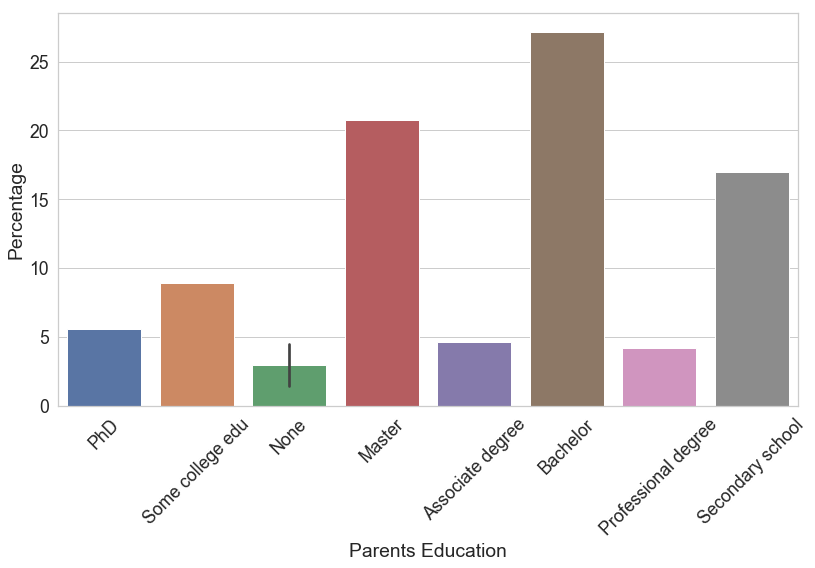

In [32]:

# Create plot.
sns.set(style="whitegrid", font_scale=1.6)
ax = sns.barplot(x='Parents Education', y='Percentage', data=pct_edu)
for item in ax.get_xticklabels():
    item.set_rotation(45)
ax.figure.savefig("Edu_parents_distribution.jpeg")
